# <center>STUDENT AT INSTITUT POLYTECHNIQUE DE PARIS 24 MAY 2020</center>#
# <center>PROHACK/International Data Science Hackathon</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [1]:
import csv
import marshal
import numpy as np
import pandas as pd
from math import sqrt
import networkx as nwx
import tensorflow as tf
from sklearn import svm
from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [2]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## TO USE THIS FUNCTION TO SAVE THE TARGET RESULT

1-- This function take a list of of value(liste_to_save) and the string(file_name) and create a file named "file_name.csv" containing our values

In [3]:
#this function allow to save a list data in a csv file
def save_liste(liste_to_save,file_name):    
    size_liste=len(liste_to_save)
    file_name=file_name+".csv"
    
    with open(file_name, "w") as f_write:
        writer = csv.writer(f_write, delimiter=",")
        writer.writerow(("index","pred","opt_pred"))

        for i in range(size_liste):
            writer.writerow((i+1,float(liste_to_save[i][0]),float((liste_to_save[i][1]))))

## IMPORTING DATA 

In [4]:
#load the data
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

## TO SEE THE CHARACTERISTICS OF TRAINING AND TESTING DATAS

1- Here we display a summary of the characteristics of our data

In [5]:
#to see the size of the datas
print("training data size    = ",train_data.shape)
print("testing data size     = ",test_data.shape)

training data size    =  (3865, 80)
testing data size     =  (890, 79)


In [6]:
#see the type of each training data
print(train_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [7]:
#see the type of each testing data(bormaly it is the same with training)
print(test_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [8]:
#to see the statistique of the training data
print(train_data.describe(include="all"))

        galactic year        galaxy  existence expectancy index  \
count    3.865000e+03          3865                 3864.000000   
unique            NaN           181                         NaN   
top               NaN  Tucana Dwarf                         NaN   
freq              NaN            26                         NaN   
mean     1.000709e+06           NaN                    0.872479   
std      6.945463e+03           NaN                    0.162367   
min      9.900250e+05           NaN                    0.227890   
25%      9.950060e+05           NaN                    0.763027   
50%      1.000000e+06           NaN                    0.907359   
75%      1.006009e+06           NaN                    0.992760   
max      1.015056e+06           NaN                    1.246908   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                     3864.000000              3837.000000   3837.000000   
unique                            N

In [9]:
#Print the first lines for to see the caracteristic of training data and differents columns
print(train_data.head())

   galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                            

In [10]:
#to see the statistique of the testing data
print(test_data.describe(include="all"))

        galactic year             galaxy  existence expectancy index  \
count    8.900000e+02                890                  885.000000   
unique            NaN                172                         NaN   
top               NaN  Andromeda XXI[57]                         NaN   
freq              NaN                 10                         NaN   
mean     1.011498e+06                NaN                    0.923881   
std      2.881505e+03                NaN                    0.134856   
min      1.007012e+06                NaN                    0.456086   
25%      1.009020e+06                NaN                    0.834118   
50%      1.011030e+06                NaN                    0.944683   
75%      1.014049e+06                NaN                    1.022712   
max      1.016064e+06                NaN                    1.250508   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                      885.000000               885

In [11]:
#Print the first lines for to see the caracteristic of testing data and differents columns
print(test_data.head())

   galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                

## TO DETERMINATE THE NUMBER AND THE PERCENTAGE OF THE MISSING VALUES FOR EACH COLUMNS 

1-- We use the isnull function to determine the missing values in the columns

2--We have created the list dolonne_a_supprimer which contains the list of columns to delete during preprocessing. These columns correspond to the column for which the percentage of missing data is greater than 15%

3--The column contains the data used for the training of our models

In [12]:
#we visualize the number of missing data for each column for training data
#We create a list "column_to_delete"
#we create a list "column_uses_for_the_training"
column_training_data=train_data.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(80):
    percentage=100*(train_data[train_data[column_training_data[i]].isnull()].shape[0]/train_data.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", train_data[train_data[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")
    
del column_uses_for_the_training[-1]

galactic year  =  0  =  0.0 %train
galaxy  =  0  =  0.0 %train
existence expectancy index  =  1  =  0.0258732212160414 %train
existence expectancy at birth  =  1  =  0.0258732212160414 %train
Gross income per capita  =  28  =  0.7244501940491591 %train
Income Index  =  28  =  0.7244501940491591 %train
Expected years of education (galactic years)  =  133  =  3.4411384217335055 %train
Mean years of education (galactic years)  =  363  =  9.391979301423028 %train
Intergalactic Development Index (IDI)  =  391  =  10.116429495472186 %train
Education Index  =  391  =  10.116429495472186 %train
Intergalactic Development Index (IDI), Rank  =  433  =  11.203104786545925 %train
Population using at least basic drinking-water services (%)  =  1844  =  47.71021992238034 %train
Population using at least basic sanitation services (%)  =  1850  =  47.86545924967658 %train
Gross capital formation (% of GGP)  =  2363  =  61.13842173350582 %train
Population, total (millions)  =  2594  =  67.11513583441139

In [13]:
#We can see here the percentage of missing rows in the test data on the columns that we want to keep for our analysis
column_testing_data=test_data.columns
for i in range(79):
    if((column_testing_data[i] in column_to_delete)==False ):
        print("Number of missing data ",column_testing_data[i]," = ", test_data[test_data[column_testing_data[i]].isnull()].shape[0]," = ",100*(test_data[test_data[column_testing_data[i]].isnull()].shape[0]/890),"%test")

Number of missing data  galactic year  =  0  =  0.0 %test
Number of missing data  galaxy  =  0  =  0.0 %test
Number of missing data  existence expectancy index  =  5  =  0.5617977528089888 %test
Number of missing data  existence expectancy at birth  =  5  =  0.5617977528089888 %test
Number of missing data  Gross income per capita  =  5  =  0.5617977528089888 %test
Number of missing data  Income Index  =  5  =  0.5617977528089888 %test
Number of missing data  Expected years of education (galactic years)  =  5  =  0.5617977528089888 %test
Number of missing data  Mean years of education (galactic years)  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI)  =  8  =  0.8988764044943821 %test
Number of missing data  Education Index  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI), Rank  =  10  =  1.1235955056179776 %test


# <center> PREPROCESSING DATA  </center>#

1--This function takes as argument a pandas dataframe containing our data in csv file and does the necessary preprocessing by returning an array numpy which will be used by our classification algorithms. To do this function, do the following processing.

2--No line in the dataframe is deleted: therefore the number of input lines is equal to the number of output lines

3--We remove all columns with a percentage of missing data in the training data greater than 15%.

4--We have transformed the qualitative variables galaxy into quantitative variable by encoding and after we have deleted the galaxy column

5--In the remaining columns, we replaced the missing data with the median value of the column.

6--We have transformed the panda datafram into a numpy array that our preprocessing function will return for

7--The returned numpy array will be used to train our models.

8--We must provide our processing function with a dataframe that does not include the index to predict: therefore a dataframe of 79 columns

In [14]:
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
galaxy_categoricial=train_data.galaxy.value_counts()
dictionnary_for_encoding_galaxy={}
i=0;
for cle in galaxy_categoricial.keys() :
    i=i+1
    dictionnary_for_encoding_galaxy[cle]=i

In [15]:
def Feature_Engineering(data):
    """We use this function to do the preprocessing of the datas"""
    
    #We delete all columns where the number of rows with missing data is greater than 15%
    #For this we use the list column_to_delete that we have created in
    column_data=data.columns
    nb_lines_data=data.shape[0]
    for i in range(79):
        if(column_data[i] in column_to_delete):
            del data[column_data[i]]    
    
    #We transforme the categorial variable galaxy in integer
    wassa=[]
    for i in range(nb_lines_data):
        wassa.append(dictionnary_for_encoding_galaxy[data.galaxy[i]])
    data["galaxy_encoding"]=wassa
    
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

# <center> PREDICTION ALGORITHM </center> #

# 1-- we have implemented several classification algorithms. The goal is to determine which is the best algorithm.
# 2-- For each algorithm, we determined the execution time and we built a graph which gives the precision graph as a function of the number of parameters
# 3-- To train our prediction algorithms, we split the data into 2 parts: 70% for training the data and 30% for testing the data.


# GRADIENT BOOSTING REGRESSOR #


In [83]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_BaggingRegressor=[]
parameter_BaggingRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_BaggingRegressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)

    #predictor and calcul rms
    prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_BaggingRegressor.append(rmse)
timer(start_time)


Time taken: 0 hours 0 minutes and 21.91 seconds.


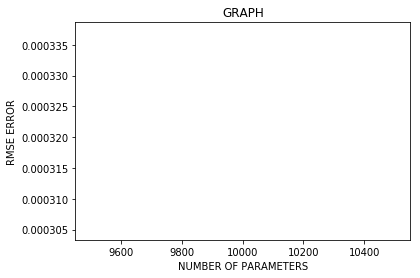

MIN ERROR RMSE== 0.0003209979834480218     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [84]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(accuracy_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

MIN ERROR RMSE== 0.020920659887323532     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
MIN ERROR RMSE== 0.020967149332005625     OBTAIN WITH learning_rate== 0.02      and n_estimators== 500001
MIN ERROR RMSE== 0.020858002041096474     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001 
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.02079566695403087     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.020557447070987417     OBTAIN WITH learning_rate== 0.09      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.020528025813641004     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1


In [62]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=bagging_regressor.predict(test_data_preprocessing)
#---------------------------------------------------------------------------------------------------------------
op_pred=repartition_energy(test_data,10)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    print(prediction_liste[i])

#save the prediction
save_liste(prediction_liste,"mamedou80")

energy_for_inf_0_7 5000
energy_for_sup_0_7 45000
percentage_sup_0_7== 0.9000000000000002
percentage_inf_0_7== 0.06635903365960888


In [78]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=bagging_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
#---------------------------------------------------------------------------------------------------------------
op_pred=repartition_energy_strategy_2(test_data,11)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    print(prediction_liste[i])

#save the prediction
save_liste(prediction_liste,"mamedou802")

energy_for_inf_0_7 5498.9
energy_for_sup_0_7 44491.1
percentage_sup_0_7== 0.889822
percentage_inf_0_7== 0.10997800000000005
[0.04095686595812395, 80.8643849138603]
[0.034360935490819096, 82.73988474342457]
[0.03910836023755395, 81.3643127815687]
[0.04025753348069814, 81.05135349259189]
[0.0205352616800537, 87.79294316469223]
[0.028699179934875335, 84.58725054379101]
[0.02898481303474637, 84.48775599876353]
[0.0405375785589349, 80.97617217886587]
[0.04102304567000088, 80.84682466678711]
[0.03958358586444479, 81.23401356142885]
[0.040437277546549695, 81.00305114356232]
[0.022712710330579235, 86.86099167795795]
[0.04056245386466026, 80.96951427589956]
[0.039133350123034, 81.35742960863628]
[0.02623139313609516, 85.47876009165337]
[0.03691831746842994, 81.98155600157831]
[0.017069657569233315, 89.4228564001861]
[0.0300160646073755, 84.13450963684103]
[0.03782087873403184, 81.72375746042226]
[0.04096580821889774, 80.86201082569958]
[0.039254164565908266, 81.32420197571686]
[0.02074626392262

## CONCLUSION : ????

# XGB REGRESSOR #

In [49]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_xgb_regressor=[]
parameter_xgb_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(100000,100001):
    parameter_xgb_regressor.append(i+1)
    xgb_clf_regressor =XGBRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the xgb model
    xgb_clf_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)
    
    #predictor and calcul rms
    prediction_=xgb_clf_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_xgb_regressor.append(rmse)
timer(start_time)

print(rmse)

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:42:37] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Time taken: 0 hours 1 minutes and 38.35 seconds.
0.002075358474702435


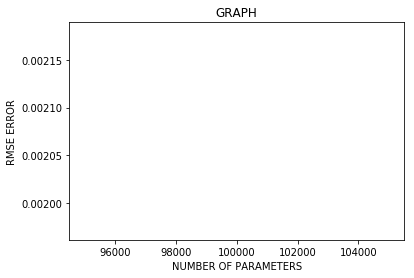

MIN ERROR RMSE== 0.002075358474702435     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001


In [50]:
#BUILD THE GRAPH
X=np.array(parameter_xgb_regressor)
Y=np.array(accuracy_xgb_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [425]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
#---------------------------------------------------------------------------------------------------------------
op_pred=repartition_energy(test_data,80)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    print(prediction_liste[i])

#save the prediction
save_liste(prediction_liste,"mamedou80")

energy_for_inf_0_7 40000
energy_for_sup_0_7 10000
percentage_sup_0_7== 0.20000000000000012
percentage_inf_0_7== 0.13022827525688674
[0.042893976, 100]
[0.04075697, 100]
[0.04006514, 100]
[0.040369183, 100]
[0.023474395, 100]
[0.032377034, 100]
[0.030951262, 100]
[0.040924132, 100]
[0.04237947, 100]
[0.040829003, 100]
[0.038342446, 100]
[0.023050964, 100]
[0.041659772, 100]
[0.039187998, 100]
[0.028174132, 100]
[0.038870513, 100]
[0.018081427, 100]
[0.030861944, 100]
[0.040184915, 100]
[0.04008192, 100]
[0.037988096, 100]
[0.022208124, 100]
[0.037618548, 100]
[0.022432089, 100]
[0.04280159, 100]
[0.018667221, 100]
[0.029532492, 100]
[0.037235856, 100]
[0.039922714, 100]
[0.034867644, 100]
[0.040305942, 100]
[0.044496506, 100]
[0.04125634, 100]
[0.05307108, 100]
[0.018585205, 100]
[0.03982058, 100]
[0.043574065, 100]
[0.03888473, 100]
[0.02162093, 100]
[0.025663167, 100]
[0.04186973, 100]
[0.018513978, 100]
[0.042276233, 100]
[0.03982669, 100]
[0.052104205, 100]
[0.029192865, 100]
[0.039

In [63]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
#---------------------------------------------------------------------------------------------------------------
op_pred=repartition_energy_strategy_2(test_data,10)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    print(prediction_liste[i])

#save the prediction
save_liste(prediction_liste,"mamedou80")

energy_for_inf_0_7 5000
energy_for_sup_0_7 45000
percentage_sup_0_7== 0.8999999455008743
percentage_inf_0_7== 0.10000001127531394
[0.041484058, 73.48111514583604]
[0.03577268, 74.92924717021567]
[0.039638877, 73.93061258254376]
[0.040876806, 73.6272420397975]
[0.02160734, 79.48970644645027]
[0.028483957, 77.06534952082546]
[0.029021025, 76.89466358372022]
[0.041766644, 73.41369816465702]
[0.04028222, 73.77201824511164]
[0.04143238, 73.49348275579797]
[0.0411281, 73.56656088417705]
[0.021695048, 79.45558100414789]
[0.04207915, 73.33957472071612]
[0.03939295, 73.99178116058911]
[0.027260125, 77.46336222983314]
[0.037564874, 74.45624187848534]
[0.016691059, 81.57179886884548]
[0.029382318, 76.78115875687108]
[0.037079334, 74.58260173772132]
[0.041869134, 73.38933878853067]
[0.040822387, 73.64042006294783]
[0.02064246, 79.87152850936818]
[0.036699176, 74.6824528641139]
[0.018568456, 80.7346537903584]
[0.04170516, 73.42833845508204]
[0.023989677, 78.59476363897677]
[0.027344614, 77.43546757

## CONCLUSION: ?????

## RANDOM FOREST REGRESSOR

In [85]:
#load datalassifier 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_random_forest_regressor=[]
parameter_random_forest_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_random_forest_regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the random forest model
    rfc_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)    
    #predictor and calcul rms
    prediction_=rfc_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_random_forest_regressor.append(rmse)
timer(start_time)


Time taken: 0 hours 1 minutes and 6.37 seconds.


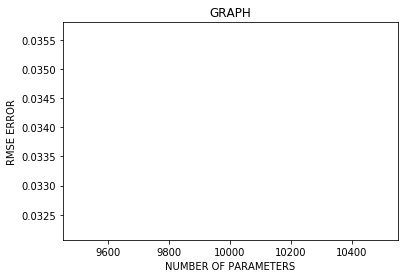

MIN ERROR== 0.03393577554645804      and n_estimators== 10001


In [86]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_regressor)
Y=np.array(accuracy_random_forest_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR==",min_rmse,"     and n_estimators==",estimator)

## CONCLUSION: ?????

In [ ]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=rfc_regressor.predict(test_data_preprocessing)
#---------------------------------------------------------------------------------------------------------------
op_pred=repartition_energy(test_data,80)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    print(prediction_liste[i])

#save the prediction
save_liste(prediction_liste,"mamedou80")

## TEST WITHOUT PREPROCESSING

In [176]:
#load datalassifier 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#---------------------------------------------------------------------------------------------------------------
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
galaxy_categoricial=train_data.galaxy.value_counts()
dictionnary_for_encoding_galaxy={}
i=0;
for cle in galaxy_categoricial.keys() :
    i=i+1
    dictionnary_for_encoding_galaxy[cle]=i
nb_lines_data=train_data.shape[0]
wassa=[]
for i in range(nb_lines_data):
    wassa.append(dictionnary_for_encoding_galaxy[train_data.galaxy[i]])

train_data["galaxy_encoding"]=wassa
del train_data["galaxy"]
#preprocessing Data
train_data_preprocessing=train_data.fillna(train_data.median()).values

#---------------------------------------------------------------------------------------------------------------
#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_random_forest_regressor=[]
parameter_random_forest_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_random_forest_regressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the random forest model
    bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)    
    #predictor and calcul rms
    prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_random_forest_regressor.append(rmse)
timer(start_time)


Time taken: 0 hours 1 minutes and 39.95 seconds.


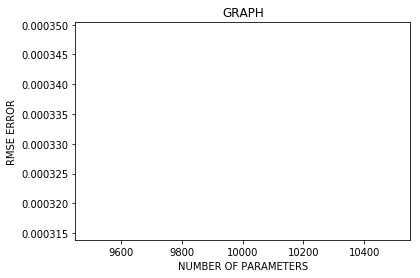

MIN ERROR== 0.0003321281251286444      and n_estimators== 10001


In [177]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_regressor)
Y=np.array(accuracy_random_forest_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR==",min_rmse,"     and n_estimators==",estimator)

In [208]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
#---------------------------------------------------------------------------------------------------------------
nb_lines_data_test=test_data.shape[0]
wassa_test=[]
for i in range(nb_lines_data_test):
    wassa_test.append(dictionnary_for_encoding_galaxy[test_data.galaxy[i]])

test_data["galaxy_encoding"]=wassa_test
del test_data["galaxy"]
#preprocessing Data
test_data_preprocessing=test_data.fillna(test_data.median()).values
#---------------------------------------------------------------------------------------------------------------
prediction_test=bagging_regressor.predict(test_data_preprocessing)
test_data["y"]=abs(np.array(prediction_test))
#---------------------------------------------------------------------------------------------------------------
op_pred=repartition_energy_strategy_2(test_data,12)
prediction_liste=[]
#---------------------------------------------------------------------prediction_liste[",i,"]==------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([abs(prediction_test[i]),op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    #print("prediction_liste[",i,"]==",prediction_liste[i])

#save the prediction
save_liste(prediction_liste,"mamedou803")

energy_for_inf_0_7 5998.799999999999
energy_for_sup_0_7 43991.2
percentage_sup_0_7== 0.8798239999999996
percentage_inf_0_7== 0.11997599999999999


## <center> ENERGY OPTIMISATIPON TEST </center>##

In [38]:
#load datalassifier 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we extract the index in training data
#galactic_year=train_data["galactic year"]
#existence_expectancy_index=train_data["existence expectancy index"]
#existence_expectancy_at_birth=train_data["existence expectancy at birth"]
#Income_Index=train_data["Income Index"]
#Expected_years_of_education_galactic_years=train_data["Expected years of education (galactic years)"]
#Mean_years_of_education_galactic_years=train_data["Mean years of education (galactic years)"]
#Intergalactic_Development_Index_IDI=train_data["Intergalactic Development Index (IDI)"]
#Education Index=train_data["Education Index"]
existence_expectancy_index=train_data["Intergalactic Development Index (IDI), Rank"]

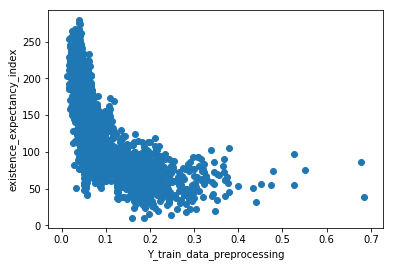

In [39]:
plt.scatter(Y_train_data_preprocessing,existence_expectancy_index)  # on utilise la fonction sinus de Numpy
plt.xlabel('Y_train_data_preprocessing')
plt.ylabel("existence_expectancy_index")
plt.show()

In [44]:
#potential augmentation
Potential_for_increase_in_the_Index=-np.log(Y_train_data_preprocessing+0.01)+3
Likely_ncrease_n_he_ndex=(Potential_for_increase_in_the_Index**2)/1000

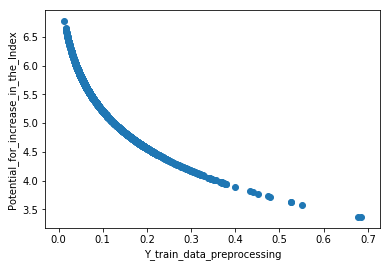

In [45]:
plt.scatter(Y_train_data_preprocessing,Potential_for_increase_in_the_Index)  # on utilise la fonction sinus de Numpy
plt.xlabel('Y_train_data_preprocessing')
plt.ylabel("Potential_for_increase_in_the_Index")
plt.show()

## STRATEGY OF ENERGY OPTIMIZATION

In [123]:
def repartition_energy(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"].max()+0.01
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"].max()+0.01
    
    sum_existence_expectancy_index_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"]).sum()
    sum_existence_expectancy_index_inf_0_7=(max_inf_0_7-GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"]).sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=(max_sup_0_7-data_energy["existence expectancy index"][i])*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=(max_inf_0_7-data_energy["existence expectancy index"][i])*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [196]:
def repartition_energy_strategy_2(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we calculate potential increase
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    sum_existence_expectancy_index_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["Potential for increase in the Index"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [ ]:
def repartition_energy_strategy_2(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we calculate potential increase
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    sum_existence_expectancy_index_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["Potential for increase in the Index"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy